In [31]:
# pip install -U imbalanced-learn
# !pip install xgboost
# !pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/14/67e9b2b2379cb530c0412123a674d045eca387dfcfa7db1c0028857b0a66/tensorflow-2.16.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 6.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 18.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.2 MB/s eta 0:00:00
  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
twitter = pd.read_csv('twitter_cleaned_stemmed-2.csv', index_col=False)
reddit = pd.read_csv('reddit_cleaned_stemmed.csv', index_col=False)

In [3]:
reddit.head()

,Unnamed: 0.1,Unnamed: 0,text,class
0,0,2,ex wife threaten suiciderec left wife good che...,suicide
1,1,3,weird get affect compliment come someon know i...,non-suicide
2,2,4,final almost never hear bad year ever swear fu...,non-suicide
3,3,8,need helpjust help cri hard,suicide
4,4,9,losthello name adam struggl year afraid past y...,suicide


In [4]:
reddit.drop({'Unnamed: 0.1', 'Unnamed: 0'}, axis=1, inplace=True)

In [5]:
reddit.head()

,text,class
0,ex wife threaten suiciderec left wife good che...,suicide
1,weird get affect compliment come someon know i...,non-suicide
2,final almost never hear bad year ever swear fu...,non-suicide
3,need helpjust help cri hard,suicide
4,losthello name adam struggl year afraid past y...,suicide


In [6]:
twitter.columns

Index(['Unnamed: 0', 'Tweet', 'Suicide'], dtype='object')

In [7]:
twitter.drop({'Unnamed: 0'}, axis=1, inplace=True)

In [8]:
twitter.rename(columns={'Tweet': 'text', 'Suicide': 'class'}, inplace=True)

In [9]:
twitter.head()

,text,class
0,make lunch,0
1,alexia want money,0
2,dizzyhrvi crap took forev put togeth iam go go...,1
3,jnaylor kiwitweet hey jer sinc start twitter,0
4,tri quot delici librari quot mix result bar co...,0


In [10]:
reddit.dropna(how='any', inplace=True)
twitter.dropna(how='any', inplace=True)

In [11]:
le = LabelEncoder()
reddit['class'] = le.fit_transform(reddit['class'])

In [12]:
reddit['class'].value_counts()

class
1    116015
0    115957
Name: count, dtype: int64

In [13]:
X_twitter = twitter['text']
y_twitter = twitter['class']

X_reddit = reddit['text']
y_reddit = reddit['class']

In [14]:
X_twitter

0                                               make lunch
1                                        alexia want money
2        dizzyhrvi crap took forev put togeth iam go go...
3             jnaylor kiwitweet hey jer sinc start twitter
4        tri quot delici librari quot mix result bar co...
                               ...                        
10901    ever laid bed night cri good enough count flaw...
10902    fault blame pain still alon insid broken home ...
10903    stop ask trust still cough water last time let...
10904            never know handl sad cri make feel stupid
10905    cancer take life blame cancer depress disea bl...
Name: text, Length: 10866, dtype: object

In [15]:
X_reddit

0         ex wife threaten suiciderec left wife good che...
1         weird get affect compliment come someon know i...
2         final almost never hear bad year ever swear fu...
3                               need helpjust help cri hard
4         losthello name adam struggl year afraid past y...
                                ...                        
232069                            like rock go get anyth go
232070    tell mani friend lone everyth depriv prebought...
232071    pee probabl tast like salti tea someon drank p...
232072    usual stuff find herei post sympathi piti know...
232073    still beaten first boss hollow knight fought t...
Name: text, Length: 231972, dtype: object

Feature Engineering
1. Bag of Words
2. TF-IDF
3. Latent Semantic Indexing
4. N-grams
5. Latent Dirichlet Allocation

In [ ]:
#from sklearn.decomposition import TruncatedSVD

#lsa = TruncatedSVD(n_components=100)
#X_trainreddit80_tfidf_lsa = lsa.fit_transform(X_trainreddit80_tfidf)
#X_testreddit80_tfidf_lsa = lsa.transform(X_testreddit80_tfidf)

#X_trainreddit80_cv_lsa = lsa.fit_transform(X_trainreddit80_cv)
#X_testreddit80_cv_lsa = lsa.transform(X_testreddit80_cv)

#X_train_twitter_tfidf_smote_lsa = lsa.fit_transform(X_train_twitter_tfdidf_smote)
#X_test_twitter80_tfidf = lsa.transform(X_testtwitter80_tfidf)
#X_train_twitter_cv_smote_lsa = lsa.fit_transform(X_train_twitter_cv_smote)
#X_test_twitter80_cv = lsa.transform(X_testtwitter80_cv)

In [16]:
X_trainreddit, X_testreddit, y_trainreddit, y_testreddit = train_test_split(X_reddit, y_reddit, test_size=0.2, random_state=42)
X_traintwitter, X_testtwitter, y_traintwitter, y_testtwitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

GRU

output_dim = 100
input_length= 256

#GRU for Reddit80-Twitter20

#GRU for Reddit80-Reddit20

#GRU for Twitter80-Reddit20

#GRU for Twitter80-Twitter20-CV

In [60]:
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Defining pre-processing parameters
max_len = 256 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 500

In [108]:
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(X_trainreddit)

In [109]:
# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

105955

In [110]:
MAX_SEQUENCE_LENGTH = max_len
#X_train_grureddit80tfidf = pad_sequences(X_trainreddit, maxlen=MAX_SEQUENCE_LENGTH)
#X_test_grureddit80tfidf = pad_sequences(X_testtwitter_tfidf_lsa, maxlen=MAX_SEQUENCE_LENGTH)

trainreddit_sequences = tokenizer.texts_to_sequences(X_trainreddit)
trainreddit_padded = pad_sequences(trainreddit_sequences,
                                maxlen = MAX_SEQUENCE_LENGTH,
                                padding = padding_type,
                                truncating = trunc_type)

testtwitter_sequences = tokenizer.texts_to_sequences(X_testtwitter)
testtwitter_padded = pad_sequences(testtwitter_sequences,
                               maxlen = MAX_SEQUENCE_LENGTH,
                               padding = padding_type,
                               truncating = trunc_type)

#tokenizer.fit_on_texts(X_traintwitter) https://stackoverflow.com/questions/54891464/is-it-better-to-keras-fit-to-text-on-the-entire-x-data-or-just-the-train-data

traintwitter_sequences = tokenizer.texts_to_sequences(X_traintwitter)
traintwitter_padded = pad_sequences(traintwitter_sequences,
                                maxlen = MAX_SEQUENCE_LENGTH,
                                padding = padding_type,
                                truncating = trunc_type)

testreddit_sequences = tokenizer.texts_to_sequences(X_testreddit)
testreddit_padded = pad_sequences(testreddit_sequences,
                               maxlen = MAX_SEQUENCE_LENGTH,
                               padding = padding_type,
                               truncating = trunc_type)

In [115]:
print('Shape of training use R tensor: ', trainreddit_padded.shape)
print('Shape of testing use T tensor: ', testtwitter_padded.shape)
print('Shape of training use T tensor: ', traintwitter_padded.shape)
print('Shape of testing use R tensor: ', testreddit_padded.shape)

Shape of training use R tensor:  (185577, 256)
Shape of testing use T tensor:  (2174, 256)
Shape of training use T tensor:  (8692, 256)
Shape of testing use R tensor:  (46395, 256)


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

model_GRU = Sequential()
model_GRU.add(Embedding(input_shape=(256,), input_dim=len(trainreddit_padded), output_dim=100, input_length=256, name='layer_embedding'))
model_GRU.add(GRU(16, return_sequences=True))
model_GRU.add(GRU(8, return_sequences=True))
model_GRU.add(GRU(4, return_sequences=True))
model_GRU.add(GRU(2))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU.summary()

/Users/lxy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_embedding (Embedding)     │ (None, 256, 100)       │    18,557,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_112 (GRU)                   │ (None, 256, 16)        │         5,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_113 (GRU)                   │ (None, 256, 8)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_114 (GRU)                   │ (None, 256, 4)         │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_115 (GRU)                   │ (None, 2)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,564,207 (70.82 MB)

 Trainable params: 18,564,207 (70.82 MB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# GRU for Reddit80-Twitter20
historyreddit = model_GRU.fit(trainreddit_padded, y_trainreddit, batch_size=64, epochs=10, validation_data=(testtwitter_padded, y_testtwitter))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 667s 229ms/step - accuracy: 0.5293 - loss: 0.6734 - val_accuracy: 0.8100 - val_loss: 0.4401
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 655s 226ms/step - accuracy: 0.8887 - loss: 0.2953 - val_accuracy: 0.7976 - val_loss: 0.4821
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 661s 228ms/step - accuracy: 0.8959 - loss: 0.2643 - val_accuracy: 0.8022 - val_loss: 0.4624
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 659s 227ms/step - accuracy: 0.8984 - loss: 0.2541 - val_accuracy: 0.8174 - val_loss: 0.4455
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 663s 229ms/step - accuracy: 0.9024 - loss: 0.2447 - val_accuracy: 0.7990 - val_loss: 0.4543
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 655s 226ms/step - accuracy: 0.9028 - loss: 0.2428 - val_accuracy: 0.8045 - val_loss: 0.4757
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 664s 229ms/step - accuracy: 0.9038 - loss: 0.2410 - val_accuracy: 0.7981 - val_loss: 0.4665
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 658s 227ms/step - ac

In [128]:
# Get the accuracy and loss values from the history object
accuracy_values = historyreddit.history['accuracy']
loss_values = historyreddit.history['loss']
validate_accuracy = historyreddit.history['val_accuracy']
validate_loss = historyreddit.history['val_loss']

# Create a DataFrame with the accuracy and loss values
data = pd.DataFrame({'Epoch': range(1, len(accuracy_values) + 1), 
                     'Accuracy': accuracy_values, 
                     'Loss': loss_values,
                     'Validate Accuracy': validate_accuracy,
                     'Validate Loss': validate_loss
                    })

# Save the DataFrame to a CSV file
data.to_csv('epoch_Reddit80Twitter20_GRU.csv', index=False)

In [130]:
# GRU for Reddit80-Reddit20
historybaselinereddit = model_GRU.fit(trainreddit_padded, y_trainreddit, batch_size=64, epochs=10, validation_data=(testreddit_padded, y_testreddit))

Epoch 1/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 709s 244ms/step - accuracy: 0.9081 - loss: 0.2247 - val_accuracy: 0.9180 - val_loss: 0.2146
Epoch 2/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 696s 240ms/step - accuracy: 0.9094 - loss: 0.2242 - val_accuracy: 0.9185 - val_loss: 0.2159
Epoch 3/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 699s 241ms/step - accuracy: 0.9091 - loss: 0.2244 - val_accuracy: 0.9186 - val_loss: 0.2119
Epoch 4/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 688s 237ms/step - accuracy: 0.9099 - loss: 0.2225 - val_accuracy: 0.9188 - val_loss: 0.2149
Epoch 5/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 677s 233ms/step - accuracy: 0.9110 - loss: 0.2205 - val_accuracy: 0.9185 - val_loss: 0.2134
Epoch 6/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 677s 233ms/step - accuracy: 0.9095 - loss: 0.2215 - val_accuracy: 0.9183 - val_loss: 0.2194
Epoch 7/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 685s 236ms/step - accuracy: 0.9115 - loss: 0.2221 - val_accuracy: 0.9188 - val_loss: 0.2140
Epoch 8/10
2900/2900 ━━━━━━━━━━━━━━━━━━━━ 679s 234ms/step - ac

In [131]:
# Get the accuracy and loss values from the history object
accuracy_values = historybaselinereddit.history['accuracy']
loss_values = historybaselinereddit.history['loss']
validate_accuracy = historybaselinereddit.history['val_accuracy']
validate_loss = historybaselinereddit.history['val_loss']

# Create a DataFrame with the accuracy and loss values
data = pd.DataFrame({'Epoch': range(1, len(accuracy_values) + 1), 
                     'Accuracy': accuracy_values, 
                     'Loss': loss_values,
                     'Validate Accuracy': validate_accuracy,
                     'Validate Loss': validate_loss
                    })

# Save the DataFrame to a CSV file
data.to_csv('epoch_Reddit80Reddit20_GRU.csv', index=False)

#https://www.youtube.com/watch?v=wkwtIeq9Ljo
#https://stackoverflow.com/questions/50127527/how-to-save-training-history-on-every-epoch-in-keras
model_GRU.save('Reddit_GRU.h5')

In [132]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

y_predreddit = model_GRU.predict(testtwitter_padded)
y_pred_binaryreddit = np.round(y_predreddit)

precisionreddit = precision_score(y_testtwitter, y_pred_binaryreddit)
recallreddit = recall_score(y_testtwitter, y_pred_binaryreddit)
f1reddit = f1_score(y_testtwitter, y_pred_binaryreddit)
accuracyreddit = accuracy_score(y_testtwitter, y_pred_binaryreddit)

print("Precision:", precisionreddit)
print("Recall:", recallreddit)
print("F1 Score:", f1reddit)
print("Accuracy:", accuracyreddit)

68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
Precision: 0.7298050139275766
Recall: 0.837953091684435
F1 Score: 0.7801488833746898
Accuracy: 0.796228150873965


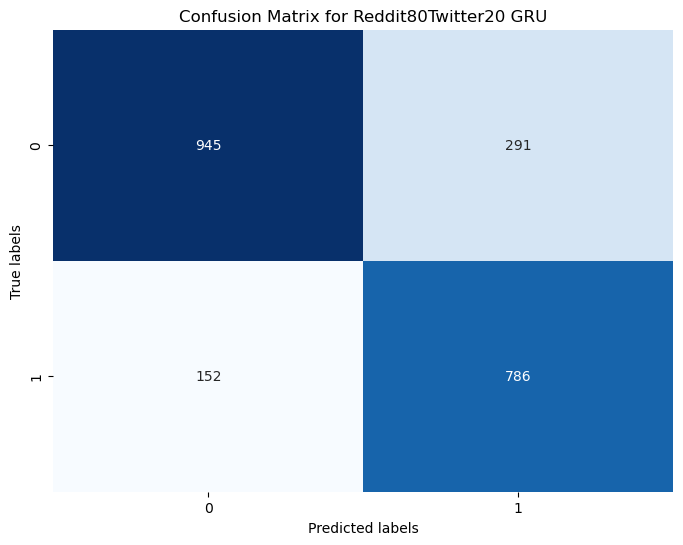

In [133]:
#https://medium.com/@nikitamalviya/confusion-matrix-870739a1ec31

reddit_cm = confusion_matrix(y_testtwitter, y_pred_binaryreddit)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Twitter20 GRU")
plt.savefig("cm_Reddit80Twitter20_GRU.png")
plt.show()

In [134]:
y_predreddit_base = model_GRU.predict(testreddit_padded)
y_pred_binaryreddit_base = np.round(y_predreddit_base)

precisionreddit_base = precision_score(y_testreddit, y_pred_binaryreddit_base)
recallreddit_base = recall_score(y_testreddit, y_pred_binaryreddit_base)
f1reddit_base = f1_score(y_testreddit, y_pred_binaryreddit_base)
accuracyreddit_base = accuracy_score(y_testreddit, y_pred_binaryreddit_base)

print("Precision:", precisionreddit_base)
print("Recall:", recallreddit_base)
print("F1 Score:", f1reddit_base)
print("Accuracy:", accuracyreddit_base)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 54s 37ms/step
Precision: 0.9067300812323751
Recall: 0.9276179813985532
F1 Score: 0.9170551050379925
Accuracy: 0.916003879728419


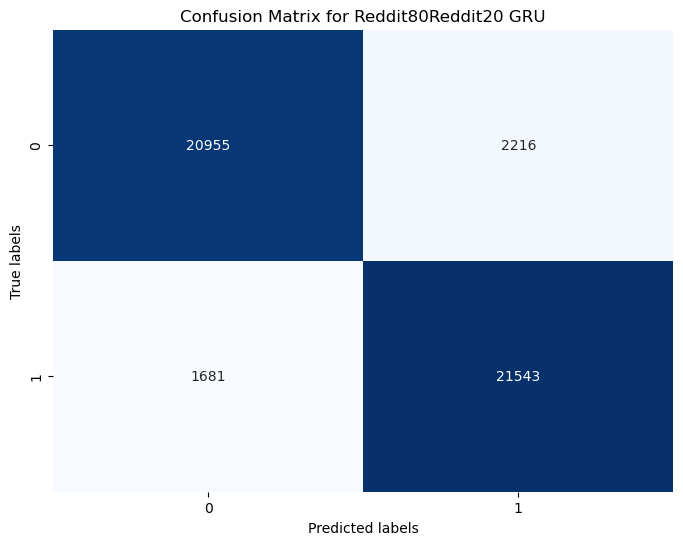

In [135]:
reddit_cm_base = confusion_matrix(y_testreddit, y_pred_binaryreddit_base)
plt.figure(figsize=(8, 6))
sns.heatmap(reddit_cm_base, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Reddit80Reddit20 GRU")
plt.savefig("cm_Reddit80Reddit20_GRU.png")
plt.show()

In [136]:
model_GRU_twt = Sequential()
model_GRU_twt.add(Embedding(input_shape=(256,), input_dim=len(traintwitter_padded), output_dim=100, input_length=256, name='layer_embedding'))
model_GRU_twt.add(GRU(16, return_sequences=True))
model_GRU_twt.add(GRU(8, return_sequences=True))
model_GRU_twt.add(GRU(4, return_sequences=True))
model_GRU_twt.add(GRU(2))
model_GRU_twt.add(Dropout(0.2))
model_GRU_twt.add(Dense(1, activation='sigmoid'))
model_GRU_twt.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU_twt.summary()

/Users/lxy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/Users/lxy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:89: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_embedding (Embedding)     │ (None, 256, 100)       │       869,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_116 (GRU)                   │ (None, 256, 16)        │         5,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_117 (GRU)                   │ (None, 256, 8)         │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_118 (GRU)                   │ (None, 256, 4)         │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_119 (GRU)                   │ (None, 2)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875,707 (3.34 MB)

 Trainable params: 875,707 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# GRU for Twitter80-Reddit20
historytwitter = model_GRU_twt.fit(traintwitter_padded, y_traintwitter, batch_size=64, epochs=10, validation_data=(testreddit_padded, y_testreddit))

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 57s 396ms/step - accuracy: 0.5720 - loss: 0.6847 - val_accuracy: 0.5226 - val_loss: 0.6985
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 55s 402ms/step - accuracy: 0.5929 - loss: 0.6774 - val_accuracy: 0.5265 - val_loss: 0.6940
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 400ms/step - accuracy: 0.5882 - loss: 0.6802 - val_accuracy: 0.5265 - val_loss: 0.7104
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.5936 - loss: 0.6772 - val_accuracy: 0.5270 - val_loss: 0.6954
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.5898 - loss: 0.6779 - val_accuracy: 0.5270 - val_loss: 0.6932
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.5864 - loss: 0.6796 - val_accuracy: 0.5270 - val_loss: 0.6968
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 400ms/step - accuracy: 0.5957 - loss: 0.6750 - val_accuracy: 0.5273 - val_loss: 0.6914
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.5866 - loss: 0

In [138]:
# GRU for Twitter80-Twitter20
historybaselinetwitter = model_GRU_twt.fit(traintwitter_padded, y_traintwitter, batch_size=64, epochs=10, validation_data=(testtwitter_padded, y_testtwitter))

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.5802 - loss: 0.6788 - val_accuracy: 0.5837 - val_loss: 0.6754
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.5834 - loss: 0.6771 - val_accuracy: 0.5837 - val_loss: 0.6771
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.5926 - loss: 0.6746 - val_accuracy: 0.5842 - val_loss: 0.6749
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.5839 - loss: 0.6769 - val_accuracy: 0.5860 - val_loss: 0.6757
Epoch 5/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.5780 - loss: 0.7047 - val_accuracy: 0.5906 - val_loss: 0.6729
Epoch 6/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - accuracy: 0.6560 - loss: 0.6270 - val_accuracy: 0.7576 - val_loss: 0.5371
Epoch 7/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 207ms/step - accuracy: 0.8221 - loss: 0.4499 - val_accuracy: 0.8427 - val_loss: 0.3966
Epoch 8/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 28s 206ms/step - accuracy: 0.8574 - loss: 0

In [139]:
# Get the accuracy and loss values from the history object
accuracy_values = historytwitter.history['accuracy']
loss_values = historytwitter.history['loss']
validate_accuracy = historytwitter.history['val_accuracy']
validate_loss = historytwitter.history['val_loss']

# Create a DataFrame with the accuracy and loss values
data = pd.DataFrame({'Epoch': range(1, len(accuracy_values) + 1), 
                     'Accuracy': accuracy_values, 
                     'Loss': loss_values,
                     'Validate Accuracy': validate_accuracy,
                     'Validate Loss': validate_loss
                    })

# Save the DataFrame to a CSV file
data.to_csv('epoch_Twitter80Reddit20_GRU.csv', index=False)

In [140]:
y_predtwitter = model_GRU_twt.predict(testreddit_padded)
y_pred_binarytwitter = np.round(y_predtwitter)

precisiontwitter = precision_score(y_testreddit, y_pred_binarytwitter)
recalltwitter = recall_score(y_testreddit, y_pred_binarytwitter)
f1twitter = f1_score(y_testreddit, y_pred_binarytwitter)
accuracytwitter = accuracy_score(y_testreddit, y_pred_binarytwitter)

print("Precision:", precisiontwitter)
print("Recall:", recalltwitter)
print("F1 Score:", f1twitter)
print("Accuracy:", accuracytwitter)

1450/1450 ━━━━━━━━━━━━━━━━━━━━ 48s 33ms/step
Precision: 0.6946199016029202
Recall: 0.9423010678608337
F1 Score: 0.7997222679018436
Accuracy: 0.7637460933290225


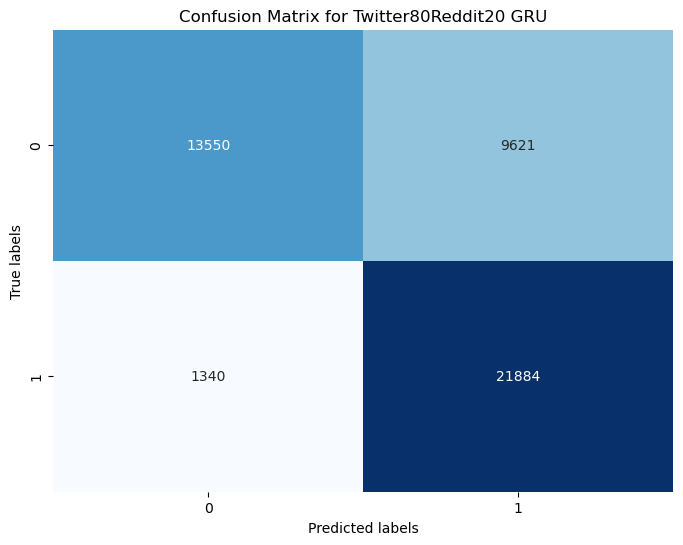

In [141]:
twitter_cm = confusion_matrix(y_testreddit, y_pred_binarytwitter)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Reddit20 GRU")
plt.savefig("cm_Twitter80Reddit20_GRU.png")
plt.show()

In [142]:
# Get the accuracy and loss values from the history object
accuracy_values = historybaselinetwitter.history['accuracy']
loss_values = historybaselinetwitter.history['loss']
validate_accuracy = historybaselinetwitter.history['val_accuracy']
validate_loss = historybaselinetwitter.history['val_loss']

# Create a DataFrame with the accuracy and loss values
data = pd.DataFrame({'Epoch': range(1, len(accuracy_values) + 1), 
                     'Accuracy': accuracy_values, 
                     'Loss': loss_values,
                     'Validate Accuracy': validate_accuracy,
                     'Validate Loss': validate_loss
                    })

# Save the DataFrame to a CSV file
data.to_csv('epoch_Twitter80Twitter20_GRU.csv', index=False)

model_GRU_twt.save('Twitter_GRU.h5')

In [143]:
y_predtwitter_base = model_GRU_twt.predict(testtwitter_padded)
y_pred_binarytwitter_base = np.round(y_predtwitter_base)

precisiontwitter_base = precision_score(y_testtwitter, y_pred_binarytwitter_base)
recalltwitter_base = recall_score(y_testtwitter, y_pred_binarytwitter_base)
f1twitter_base = f1_score(y_testtwitter, y_pred_binarytwitter_base)
accuracytwitter_base = accuracy_score(y_testtwitter, y_pred_binarytwitter_base)

print("Precision:", precisiontwitter_base)
print("Recall:", recalltwitter_base)
print("F1 Score:", f1twitter_base)
print("Accuracy:", accuracytwitter_base)

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Precision: 0.867027027027027
Recall: 0.8550106609808102
F1 Score: 0.8609769189479336
Accuracy: 0.8808647654093836


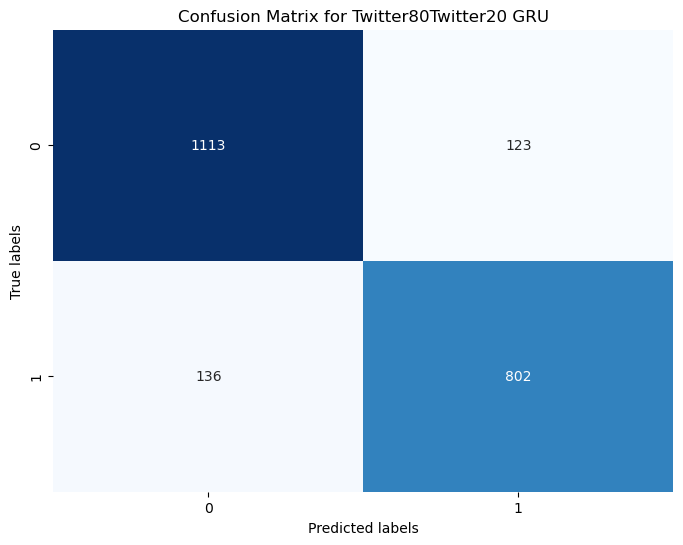

In [144]:
twitter_cm_base = confusion_matrix(y_testtwitter, y_pred_binarytwitter_base)
plt.figure(figsize=(8, 6))
sns.heatmap(twitter_cm_base, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Twitter80Twitter20 GRU")
plt.savefig("cm_Twitter80Twitter20_GRU.png")
plt.show()

In [145]:
score = {'Precision': [precisionreddit, precisionreddit_base, precisiontwitter, precisiontwitter_base], 
         'Recall': [recallreddit, recallreddit_base, recalltwitter, recalltwitter_base], 
         'F1 Score': [f1reddit, f1reddit_base, f1twitter, f1twitter_base],
         'Accuracy': [accuracyreddit, accuracyreddit_base, accuracytwitter, accuracytwitter_base],
        }
df1 = pd.DataFrame(score, index = ["Reddit80Twitter20_GRU", "Reddit80Reddit20_GRU", "Twitter80Reddit20_GRU", "Twitter80Twitter20_GRU"])
df1

,Precision,Recall,F1 Score,Accuracy
Reddit80Twitter20_GRU,0.729805,0.837953,0.780149,0.796228
Reddit80Reddit20_GRU,0.906730,0.927618,0.917055,0.916004
Twitter80Reddit20_GRU,0.694620,0.942301,0.799722,0.763746
Twitter80Twitter20_GRU,0.867027,0.855011,0.860977,0.880865


In [101]:
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=300, output_dim=100, input_length=100, name='layer_embedding'))
model_GRU.add(GRU(16, return_sequences=True))
model_GRU.add(GRU(8, return_sequences=True))
model_GRU.add(GRU(4, return_sequences=True))
model_GRU.add(GRU(2))
model_GRU.add(Dropout(0.2))
model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_GRU.summary()

/Users/lxy/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_embedding (Embedding)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_108 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_109 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_110 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_111 (GRU)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
# GRU for Reddit80-Twitter20-TFIDF
#sgd
historyreddit80tfidf = model_GRU.fit(training_padded, y_trainreddit, batch_size=64, epochs=1) #validation_data=(testing_padded, y_testtwitter)

2900/2900 ━━━━━━━━━━━━━━━━━━━━ 585s 201ms/step - accuracy: 0.5082 - loss: 0.6928


In [92]:
# GRU for Reddit80-Twitter20-TFIDF
#adam
historyreddit80tfidf = model_GRU.fit(training_padded, y_trainreddit, batch_size=64, epochs=1) #validation_data=(testing_padded, y_testtwitter)

2900/2900 ━━━━━━━━━━━━━━━━━━━━ 669s 230ms/step - accuracy: 0.7230 - loss: 0.5010


In [96]:
# GRU for Reddit80-Twitter20-TFIDF
#rmsprop
historyreddit80tfidf = model_GRU.fit(training_padded, y_trainreddit, batch_size=64, epochs=1) #validation_data=(testing_padded, y_testtwitter)

2900/2900 ━━━━━━━━━━━━━━━━━━━━ 648s 222ms/step - accuracy: 0.5644 - loss: 0.6438


In [ ]:
# model_GRU

# GRU for Reddit80-Twitter20
historyreddit = model_GRU.fit(trainreddit_padded, y_trainreddit, batch_size=64, epochs=10, validation_data=(testtwitter_padded, y_testtwitter))

# GRU for Reddit80-Reddit20
historybaselinereddit = model_GRU.fit(trainreddit_padded, y_trainreddit, batch_size=64, epochs=10, validation_data=(testreddit_padded, y_testreddit))

# GRU for Twitter80-Reddit20
historytwitter = model_GRU_twt.fit(traintwitter_padded, y_traintwitter, batch_size=64, epochs=10, validation_data=(testreddit_padded, y_testreddit))

# GRU for Twitter80-Twitter20
historybaselinetwitter = model_GRU_twt.fit(traintwitter_padded, y_traintwitter, batch_size=64, epochs=10, validation_data=(testtwitter_padded, y_testtwitter))
                                       
                                       

# GRU for Reddit80-Twitter20-TFIDF
historyreddit80tfidf = model_GRU.fit(X_train_grureddit80tfidf, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_test_grureddit80tfidf, y_testtwitter))

# GRU for Reddit80-Reddit20-TFIDF
historybaselinereddit80tfidf = model_GRU.fit(X_train_grureddit80tfidf, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80tfidf, y_testreddit))

# model_GRU_twt
# GRU for Twitter80-Reddit20-TFIDF
historytwitter80tfidf = model_GRU_twt.fit(X_train_grutwitter80tfidf, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80tfidf, y_testreddit))

# GRU for Twitter80-Twitter20-TFIDF
historybaselinetwitter80tfidf = model_GRU_twt.fit(X_train_grutwitter80tfidf, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_test_grureddit80tfidf, y_testtwitter))


# GRU for Reddit80-Twitter20-CV
historyreddit80cv = model_GRU.fit(X_train_grureddit80cv, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_test_grureddit80cv , y_testtwitter))

# GRU for Reddit80-Reddit20-CV 
historybaselineredditcv = model_GRU.fit(X_train_grureddit80cv, y_trainreddit, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80cv, y_testreddit))

# model_GRU_twt
# GRU for Twitter80-Reddit20-CV
historytwitter80cv = model_GRU_twt.fit(X_train_grutwitter80tcv, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_test_grutwitter80cv, y_testreddit))

# GRU for Twitter80-Twitter20-CV
historybaselinetwitter80cv = model_GRU_twt.fit(X_train_grutwitter80cv, y_traintwitter, batch_size=64, epochs=10, validation_data=(X_test_grureddit80cv, y_testtwitter))